# Nifty50 Closing Price Prediction using ML

* Model: Stacked LSTM
* Dataset: Nifty50 from Yahoo Fianance

## Initialization

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install statsmodels

  Using cached pandas-2.0.0-cp39-cp39-macosx_11_0_arm64.whl (10.8 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached numpy-1.24.2-cp39-cp39-macosx_11_0_arm64.whl (13.9 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.7.1-cp39-cp39-macosx_11_0_arm64.whl (7.3 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.5.0-cp39-cp39-macosx_11_0_arm64.whl (3.1 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
  Using cached contourpy-1.0.7-cp39-cp39-macosx_11_0_arm64.whl (229 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)

[

!pip install pandas: This command installs the Pandas library, which is a popular data manipulation library for Python. Pandas provides functionality for reading, writing, and manipulating tabular data in a variety of formats.

!pip install numpy: This command installs the NumPy library, which is a fundamental library for scientific computing in Python. NumPy provides functionality for working with arrays and matrices, as well as mathematical functions to operate on them.

!pip install matplotlib: This command installs the Matplotlib library, which is a powerful visualization library for Python. Matplotlib provides functionality for creating a wide range of charts and plots, including line charts, bar charts, histograms, and more.

!pip install statsmodels: This command installs the Statsmodels library, which is a statistical modeling library for Python. Statsmodels provides functionality for conducting a wide range of statistical analyses, including regression, time series analysis, and more.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd: This imports the Pandas library and renames it as "pd" to make it easier to reference in the code. By convention, the "pd" abbreviation is widely used in the Python community to refer to Pandas.

import numpy as np: This imports the NumPy library and renames it as "np" to make it easier to reference in the code. By convention, the "np" abbreviation is widely used in the Python community to refer to NumPy.

import matplotlib.pyplot as plt: This imports the pyplot module from the Matplotlib library and renames it as "plt" to make it easier to reference in the code. pyplot is a sublibrary of Matplotlib that provides functionality for creating a wide range of charts and plots.

In [6]:
df = pd.read_csv('./dataset/NIFTY50.csv')
df.index = pd.to_datetime(df['Date']).dt.date

df.drop(['Date', 'Adj Close'], axis='columns', inplace=True)
display(df.head())
display(df.tail())

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


,Open,High,Low,Close
Date,,,,
2021-04-26,14449.45020,14557.50000,14421.29981,14485.00000
2021-04-27,14493.79981,14667.54981,14484.84961,14653.04981
2021-04-28,14710.50000,14890.25000,14694.95020,14864.54981
2021-04-29,14979.00000,15044.34961,14814.45020,14894.90039
2021-04-30,14747.34961,14855.45020,14601.70020,14631.09961


This code reads a CSV file into a Pandas DataFrame, modifies the index, drops some columns, and displays the first and last few rows of the resulting DataFrame. Here's what each line does:

df = pd.read_csv('./dataset/NIFTY50.csv'): This reads the CSV file "NIFTY50.csv" from the "./dataset" directory and creates a Pandas DataFrame called "df" to store the data. The "./" notation specifies the current directory.

df.index = pd.to_datetime(df['Date']).dt.date: This sets the index of the DataFrame to the date values in the "Date" column of the DataFrame. The to_datetime function converts the "Date" column to a datetime format, and the dt.date function extracts the date component of each datetime value.

df.drop(['Date', 'Adj Close'], axis='columns', inplace=True): This drops the "Date" and "Adj Close" columns from the DataFrame along the "columns" axis (i.e., horizontally) and modifies the DataFrame in place (i.e., without creating a new DataFrame).

display(df.head()): This displays the first few rows of the modified DataFrame using the display function, which provides a formatted output that includes column headers.

display(df.tail()): This displays the last few rows of the modified DataFrame using the display function.

In [7]:
print(f'Dataset Shape: {df.shape}\n')
display(df.info())

Dataset Shape: (3326, 4)

<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, 2007-09-17 to 2021-04-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3326 non-null   float64
 1   High    3326 non-null   float64
 2   Low     3326 non-null   float64
 3   Close   3326 non-null   float64
dtypes: float64(4)
memory usage: 129.9+ KB


None

This code prints the shape of the DataFrame and displays additional information about the DataFrame using the info() method. Here's what each line does:

print(f'Dataset Shape: {df.shape}\n'): This prints the shape of the DataFrame to the console using a formatted string. The shape attribute of a DataFrame returns a tuple containing the number of rows and columns in the DataFrame.

display(df.info()): This displays additional information about the DataFrame using the info() method. This method prints a summary of the DataFrame's columns, including the column names, the number of non-null values in each column, and the data type of each column. This information can be useful for quickly identifying missing values or incorrectly formatted data. The display() function is used to format the output of the info() method in a more readable way.

In [8]:
window_len = 14
feature = 'Close'

This code defines two variables:

window_len = 14: This sets the variable window_len to the integer value 14. This variable is likely used to define the window length for a rolling average or other rolling calculation.

feature = 'Close': This sets the variable feature to the string value "Close". This variable is likely used to specify a column name in the DataFrame, for example to select a particular feature to use in a model or analysis. The "Close" column is commonly used in financial data to represent the closing price of a stock or other security.

In [10]:
!pip install --upgrade pip

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


This command upgrades the pip package manager to the latest version available. The ! prefix indicates that the command is being run from the command line rather than from within a Python script or notebook. Upgrading pip is often necessary to ensure that you can install the latest versions of Python packages using pip.

In [11]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 811.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.0 MB/s eta 0:00:00a 0:00:01


This command upgrades the scikit-learn (sklearn) Python library to the latest version available using pip. The -U option is a shorthand for the --upgrade option, which tells pip to upgrade the specified package to the latest version available. Sklearn is a popular machine learning library in Python that provides a wide range of tools for classification, regression, clustering, and other machine learning tasks. Upgrading the library to the latest version ensures that you have access to the latest features and bug fixes.

## Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

This code imports the train_test_split function from the sklearn.model_selection module and uses it to split a Pandas DataFrame into training and testing sets. Here's what each line does:

from sklearn.model_selection import train_test_split: This imports the train_test_split function from the sklearn.model_selection module. This function is used to split data into training and testing sets for machine learning tasks.

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False): This uses the train_test_split function to split the df DataFrame into training and testing sets. The test_size parameter specifies the proportion of the data to use for testing (in this case, 20% of the data), and the shuffle parameter is set to False to prevent shuffling of the data before splitting. The resulting training and testing sets are assigned to the variables df_train and df_test, respectively.

In [13]:
df_train.head()

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


This code displays the first few rows of the df_train DataFrame, which was created in the previous code cell by splitting the original DataFrame into training and testing sets. The head() method is used to display the first few rows of the DataFrame. The number of rows displayed by default is 5, but you can specify a different number by passing an integer argument to the head() method.

In [15]:
df_test.head()

,Open,High,Low,Close
Date,,,,
2018-08-07,11423.15039,11428.95020,11359.70020,11389.4502
2018-08-08,11412.50000,11459.95020,11379.29981,11450.0000
2018-08-09,11493.25000,11495.20020,11454.09961,11470.7002
2018-08-10,11474.95020,11478.75000,11419.65039,11429.5000
2018-08-13,11369.59961,11406.29981,11340.29981,11355.7500


This code displays the first few rows of the df_test DataFrame, which was created in the previous code cell by splitting the original DataFrame into training and testing sets. The head() method is used to display the first few rows of the DataFrame. The number of rows displayed by default is 5, but you can specify a different number by passing an integer argument to the head() method.

## Plotting Closing Prices

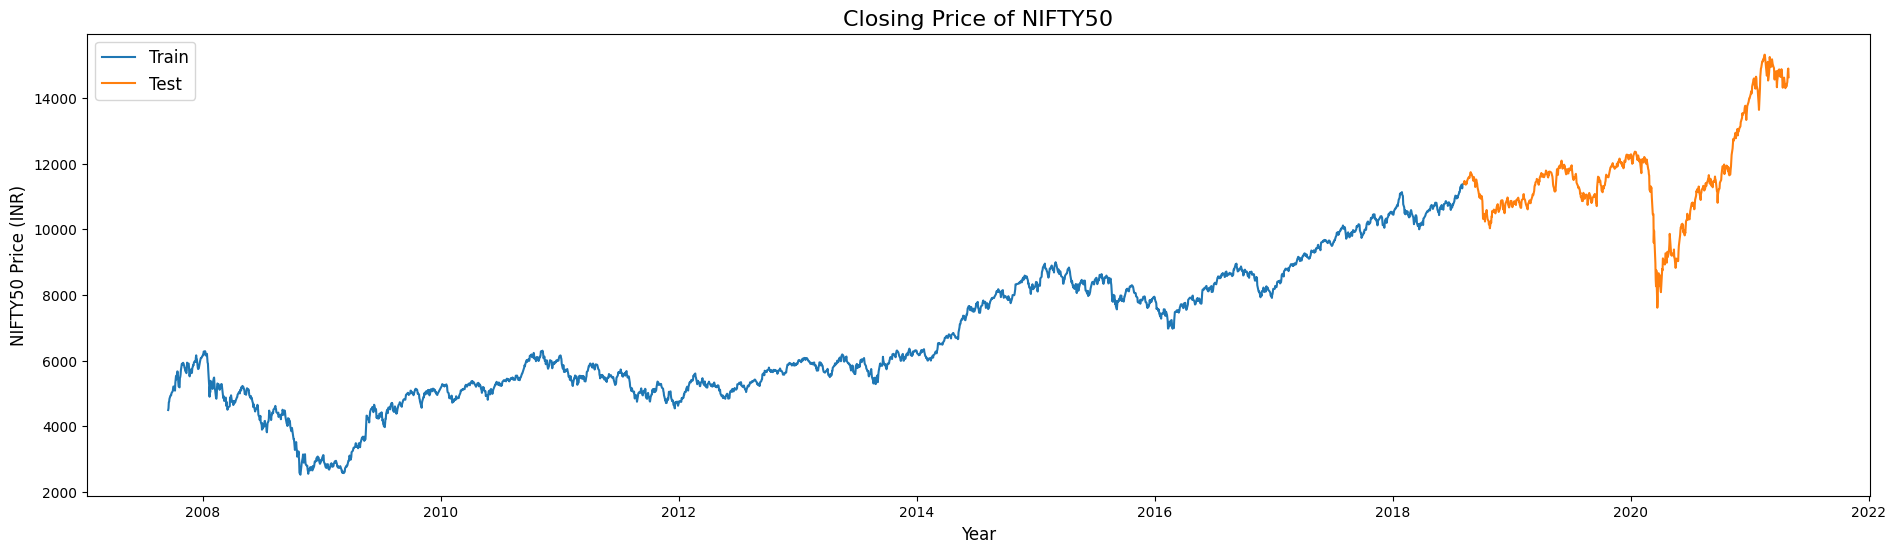

In [16]:
fig, ax = plt.subplots(figsize=(23, 6))
ax.plot(df_train[feature], label='Train')
ax.plot(df_test[feature], label='Test')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('NIFTY50 Price (INR)', fontsize=12)
ax.set_title('Closing Price of NIFTY50', fontsize=16)
ax.legend(fontsize=12)

This code uses Matplotlib to create a line chart showing the closing price of the NIFTY50 stock market index for the training and testing sets. Here's what each line does:

fig, ax = plt.subplots(figsize=(23, 6)): This creates a new figure and axes for the plot, with a width of 23 inches and a height of 6 inches.

ax.plot(df_train[feature], label='Train'): This plots the values of the "Close" column in the df_train DataFrame on the ax axes object. The label parameter is set to "Train" to create a legend entry for the training set.

ax.plot(df_test[feature], label='Test'): This plots the values of the "Close" column in the df_test DataFrame on the ax axes object. The label parameter is set to "Test" to create a legend entry for the testing set.

ax.set_xlabel('Year', fontsize=12): This sets the label for the x-axis to "Year" with a font size of 12.

ax.set_ylabel('NIFTY50 Price (INR)', fontsize=12): This sets the label for the y-axis to "NIFTY50 Price (INR)" with a font size of 12.

ax.set_title('Closing Price of NIFTY50', fontsize=16): This sets the title of the plot to "Closing Price of NIFTY50" with a font size of 16.

ax.legend(fontsize=12): This adds a legend to the plot with font size of 12. The legend entries are automatically generated from the label parameters passed to the plot() method calls.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

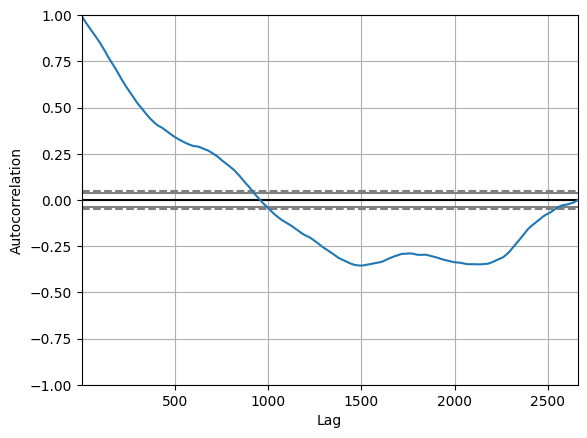

In [17]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_train[feature].values)

This code uses the autocorrelation_plot function from the pandas.plotting module to plot the autocorrelation of the closing price of the NIFTY50 stock market index for the training set. Here's what each line does:

from pandas.plotting import autocorrelation_plot: This imports the autocorrelation_plot function from the pandas.plotting module. This function is used to plot the autocorrelation of a time series.

autocorrelation_plot(df_train[feature].values): This generates an autocorrelation plot for the values of the "Close" column in the df_train DataFrame. The values attribute is used to extract the values of the column as a NumPy array, which is passed to the autocorrelation_plot function. The resulting plot shows the correlation between the closing prices at different lags, with the x-axis representing the lag and the y-axis representing the correlation coefficient. The shaded region around the x-axis indicates the 95% confidence interval for the correlation coefficients.

## Data Preprocessing

In [18]:
train = np.array(df_train[feature]).reshape(-1, 1)
test  = np.array(df_test [feature]).reshape(-1, 1)

This code converts the "Close" column of the df_train and df_test DataFrames into NumPy arrays with a shape of (-1, 1), which is commonly used to represent a single feature in machine learning models. Here's what each line does:

train = np.array(df_train[feature]).reshape(-1, 1): This extracts the values of the "Close" column in the df_train DataFrame as a NumPy array using the np.array() function. The reshape() method is then used to reshape the array into a 2D array with a single column (-1 means that the number of rows is inferred from the length of the array and the number of columns is set to 1).

test = np.array(df_test [feature]).reshape(-1, 1): This extracts the values of the "Close" column in the df_test DataFrame as a NumPy array using the np.array() function. The reshape() method is then used to reshape the array into a 2D array with a single column (-1 means that the number of rows is inferred from the length of the array and the number of columns is set to 1).

## Building the ARIMA Model

* History will contain original train set, but with each iteration we will add one datapoint
from the test set as we continue prediction

In [19]:
from statsmodels.tsa.arima.model import ARIMA

history = list(train)
order_predictions = []

for i in range(len(test)):
    model = ARIMA(history, order=(2 ,2 ,0)) # defining ARIMA model
    model_fit = model.fit() # fitting model
    y_hat = model_fit.forecast() # predicting 'return'

    order_predictions.append(y_hat[0])
    history.append(test[i])
    print('Prediction: {} of {}'.format(i+1,len(test)), end='\r')

This code uses the ARIMA model from the Statsmodels library to generate predictions for the "Close" column of the df_test DataFrame based on the history of the "Close" column in the df_train DataFrame. Here's what each line does:

history = list(train): This initializes the history list with the values of the "Close" column in the df_train DataFrame, converted to a list using the list() function.
order_predictions = []: This initializes an empty list to store the predictions generated by the ARIMA model.
for i in range(len(test)):: This sets up a loop to iterate over each value in the "Close" column of the df_test DataFrame.
model = ARIMA(history, order=(2 ,2 ,0)): This initializes an ARIMA model with a non-seasonal difference of 2 (i.e., the second difference of the time series), an autoregressive order of 2, and a moving average order of 0. These values are specified using the order parameter.
model_fit = model.fit(): This fits the ARIMA model to the history of the "Close" column in the df_train DataFrame using the fit() method.
y_hat = model_fit.forecast(): This generates a one-step-ahead forecast for the next value in the "Close" column of the df_test DataFrame using the forecast() method. The resulting forecast is a NumPy array containing the predicted value and the associated standard error and confidence interval.
order_predictions.append(y_hat[0]): This appends the predicted value (i.e., the first element of the forecast array) to the order_predictions list.
history.append(test[i]): This appends the actual value from the "Close" column of the df_test DataFrame to the history list.
print('Prediction: {} of {}'.format(i+1,len(test)), end='\r'): This prints a progress message to the console indicating the current prediction number and the total number of predictions, without starting a new line. The \r character is used to return the cursor to the beginning of the line so that subsequent messages overwrite the previous message.

## Testing the model

### Mean Error

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

error = mean_squared_error(test, order_predictions, squared=False)
print('Test MSE: %.3f' % error)

accuracy = r2_score(test, order_predictions)
print(f'Test Accuracy: {round(100*r2_score(test, order_predictions), 2)}%')

Test MSE: 177.296
Test Accuracy: 98.54%


This code uses the mean_squared_error() and r2_score() functions from the scikit-learn library to calculate performance metrics for the ARIMA model's predictions. Here's what each line does:

from sklearn.metrics import mean_squared_error, r2_score: This imports the mean_squared_error() and r2_score() functions from the scikit-learn library. These functions are used to calculate performance metrics for machine learning models.

error = mean_squared_error(test, order_predictions, squared=False): This calculates the root mean squared error (RMSE) between the predicted values (order_predictions) and the actual values (test) from the "Close" column of the df_test DataFrame using the mean_squared_error() function with the squared=False parameter. The resulting RMSE is assigned to the error variable.

print('Test MSE: %.3f' % error): This prints the RMSE to the console using a formatted string.

accuracy = r2_score(test, order_predictions): This calculates the R-squared score between the predicted values (order_predictions) and the actual values (test) from the "Close" column of the df_test DataFrame using the r2_score() function. The resulting R-squared score is assigned to the accuracy variable.

print(f'Test Accuracy: {round(100*r2_score(test, order_predictions), 2)}%'): This prints the R-squared score as a percentage to the console using an f-string. The round() function is used to round the percentage to 2 decimal places.

## Plotting Prediction vs Reality

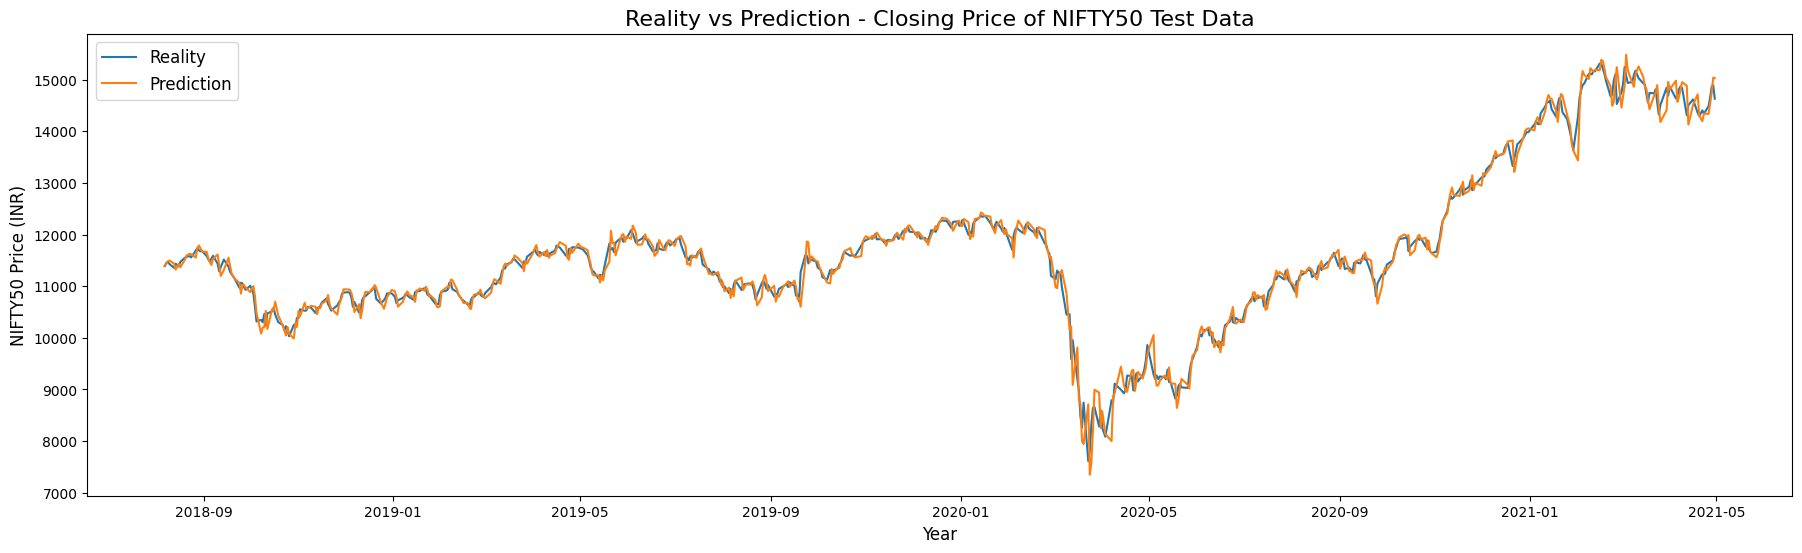

In [21]:
fig, ax = plt.subplots(figsize=(22, 6))

ax.plot(df_test[feature].index, test, label='Reality')
ax.plot(df_test[feature].index, order_predictions, label='Prediction')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('NIFTY50 Price (INR)', fontsize=12)
ax.set_title('Reality vs Prediction - Closing Price of NIFTY50 Test Data', fontsize=16)
ax.legend(fontsize=12)

This code uses Matplotlib to create a line chart showing the actual and predicted values of the "Close" column of the df_test DataFrame for the ARIMA model. Here's what each line does:

fig, ax = plt.subplots(figsize=(22, 6)): This creates a new figure and axes for the plot, with a width of 22 inches and a height of 6 inches.

ax.plot(df_test[feature].index, test, label='Reality'): This plots the actual values of the "Close" column in the df_test DataFrame on the ax axes object. The label parameter is set to "Reality" to create a legend entry for the actual values.

ax.plot(df_test[feature].index, order_predictions, label='Prediction'): This plots the predicted values of the "Close" column in the df_test DataFrame generated by the ARIMA model on the ax axes object. The label parameter is set to "Prediction" to create a legend entry for the predicted values.

ax.set_xlabel('Year', fontsize=12): This sets the label for the x-axis to "Year" with a font size of 12.
ax.set_ylabel('NIFTY50 Price (INR)', fontsize=12): This sets the label for the y-axis to "NIFTY50 Price (INR)" with a font size of 12.

ax.set_title('Reality vs Prediction - Closing Price of NIFTY50 Test Data', fontsize=16): This sets the title of the plot to "Reality vs Prediction - Closing Price of NIFTY50 Test Data" with a font size of 16.

ax.legend(fontsize=12): This adds a legend to the plot with font size of 12. The legend entries are automatically generated from the label parameters passed to the plot() method calls.